<a href="https://colab.research.google.com/github/deep1185/ga-learner-dsmp-repo/blob/master/spam_mail_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount drive
from google.colab import drive
drive.mount('/drive',force_remount=True)

Mounted at /drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import files
uploaded = files.upload()

Saving spam_ham_dataset.csv to spam_ham_dataset.csv


In [18]:
import io
email_data = pd.read_csv(io.BytesIO(uploaded['spam_ham_dataset.csv']))
# Dataset is now stored in a Pandas Dataframe

In [19]:
email_data.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [20]:
# Checking for null values
email_data.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [21]:
# dropping unwanted columns
email_data = email_data.drop("Unnamed: 0", axis = 1)
email_data = email_data.drop("label_num", axis = 1)

In [22]:
email_data

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...


In [24]:
# Changing type of ham/ spam to 1/0 as sklearn library deals with 0 and 1
email_data['type'] = email_data.label.map({'ham': 1 , 'spam' : 0}) 
email_data

,label,text,type
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,1
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",1
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",1
3,spam,"Subject: photoshop , windows , office . cheap ...",0
4,ham,Subject: re : indian springs\r\nthis deal is t...,1
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,1
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,1
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,1
5169,ham,Subject: industrial worksheets for august 2000...,1


In [25]:
spam_ham_value = email_data.label.value_counts()
spam_ham_value

ham     3672
spam    1499
Name: label, dtype: int64

In [26]:
# Calculate the ratio of spam data
print("Spam % is ",(spam_ham_value[1]/float(spam_ham_value[0]+spam_ham_value[1]))*100)

Spam % is  28.98859021465867


In [27]:
# Seperate data into variables as X and y, So that we can use Bags of Words Representation to store the data. 
X=email_data.text
y=email_data.type

In [28]:
X

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object

In [29]:
y

0       1
1       1
2       1
3       0
4       1
       ..
5166    1
5167    1
5168    1
5169    1
5170    0
Name: type, Length: 5171, dtype: int64

In [30]:
print(X.shape)
print(y.shape)

(5171,)
(5171,)


In [31]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [32]:
X_train.head()

1       Subject: hpl nom for january 9 , 2001\r\n( see...
4984    Subject: paliourg less expensive charset = iso...
3276    Subject: soldout viagra for only 0 . 78 $ per ...
2727    Subject: buyback deals - - january 2000\r\natt...
4227    Subject: accounting arrangement at meter 692 -...
Name: text, dtype: object

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorising the text
vect = CountVectorizer(stop_words='english')

In [34]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [36]:
vect.vocabulary_

{'subject': 36329,
 'hpl': 20554,
 'nom': 27640,
 'january': 22353,
 '2001': 981,
 'attached': 6456,
 'file': 17182,
 'hplnol': 20560,
 '09': 192,
 'xls': 41156,
 'paliourg': 28959,
 'expensive': 16537,
 'charset': 10175,
 'iso': 22136,
 '8859': 3495,
 'ordering': 28526,
 'eds': 15191,
 'simple': 34907,
 'private': 30779,
 'secure': 34180,
 'escription': 16143,
 'required': 32597,
 'solution': 35405,
 'easy': 15059,
 'use': 39087,
 'http': 20633,
 'hung': 20694,
 'amendedl': 5402,
 '196': 947,
 'pill': 29859,
 '36': 1712,
 'unlisting': 38904,
 'soldout': 35377,
 'viagra': 39554,
 '78': 3231,
 'cheap': 10210,
 'cialis': 10507,
 'save': 33820,
 '70': 2968,
 'shipped': 34658,
 'worldwide': 40817,
 'zocor': 41776,
 '89': 3506,
 '00': 0,
 'soma': 35412,
 'lipitor': 24387,
 'levitra': 24198,
 '22': 1091,
 'meridia': 25937,
 'ultram': 38721,
 '11': 323,
 'offer': 28118,
 'buyback': 9102,
 'deals': 13073,
 '2000': 977,
 'current': 12588,
 'aware': 6715,
 'information': 21568,
 'let': 24171,
 '

In [35]:
vect.get_feature_names()

['00',
 '000',
 '0000',
 '000000',
 '000000000002858',
 '000000000049773',
 '000080',
 '000099',
 '0001',
 '00020608',
 '0004',
 '0005',
 '0008',
 '001',
 '0010',
 '001001',
 '0012',
 '001452',
 '002',
 '0022',
 '00221',
 '0025',
 '0027',
 '0028',
 '0029',
 '003',
 '0030',
 '003002',
 '0031',
 '0038',
 '004',
 '0042',
 '0043',
 '0045',
 '0046',
 '0047',
 '0049',
 '005',
 '00501723',
 '0051',
 '006',
 '006600',
 '0067',
 '007',
 '0071',
 '0074',
 '008',
 '0080',
 '009',
 '0090',
 '01',
 '010',
 '0100',
 '0101',
 '011',
 '0117',
 '012',
 '012603',
 '013',
 '0130',
 '014',
 '01474',
 '015',
 '016',
 '017',
 '0170',
 '0182',
 '019017',
 '02',
 '020',
 '0200',
 '02010207',
 '021',
 '022',
 '0232',
 '024',
 '025',
 '0255',
 '025648',
 '026',
 '027',
 '028',
 '02886',
 '02897893',
 '029',
 '03',
 '030',
 '0300',
 '03090806',
 '0310041',
 '03149',
 '032',
 '0324',
 '0325567',
 '033',
 '0331',
 '034',
 '0347',
 '035',
 '0357',
 '036',
 '0361770',
 '0363',
 '036474336',
 '037',
 '0373',
 '0375',

In [37]:
# transform
X_train_transformed = vect.transform(X_train)
X_test_tranformed =vect.transform(X_test)

In [38]:
print(X_test[:1])

2971    Subject: what the heck\r\ndaren ,\r\nnow what ...
Name: text, dtype: object


In [39]:
print(X_test_tranformed)

  (0, 8353)	1
  (0, 8877)	1
  (0, 8921)	1
  (0, 8925)	1
  (0, 9062)	1
  (0, 10108)	1
  (0, 11276)	1
  (0, 12129)	1
  (0, 12821)	1
  (0, 12878)	1
  (0, 12973)	1
  (0, 12982)	1
  (0, 13158)	1
  (0, 13704)	1
  (0, 13854)	1
  (0, 14413)	1
  (0, 14453)	1
  (0, 15865)	1
  (0, 16684)	1
  (0, 16981)	1
  (0, 17467)	1
  (0, 17604)	1
  (0, 18025)	1
  (0, 18038)	1
  (0, 18210)	1
  :	:
  (1291, 40778)	1
  (1291, 41366)	1
  (1292, 1)	1
  (1292, 50)	1
  (1292, 111)	1
  (1292, 981)	2
  (1292, 1448)	1
  (1292, 2246)	1
  (1292, 5936)	2
  (1292, 12973)	2
  (1292, 15294)	1
  (1292, 15815)	1
  (1292, 17568)	2
  (1292, 18272)	3
  (1292, 25995)	2
  (1292, 26422)	2
  (1292, 26667)	1
  (1292, 26851)	1
  (1292, 27154)	3
  (1292, 27653)	2
  (1292, 27655)	1
  (1292, 30023)	2
  (1292, 30210)	1
  (1292, 32599)	2
  (1292, 36329)	1


In [40]:
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = bnb.predict(X_test_tranformed)

# predict probability
y_pred_proba =bnb.predict_proba(X_test_tranformed)

# accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8337200309358082

In [41]:
bnb

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [42]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[179, 200],
       [ 15, 899]])

In [43]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[179 200]
 [ 15 899]]


In [44]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.9835886214442013


In [45]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.47229551451187335


In [46]:
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.8180163785259327
0.8180163785259327


In [47]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.8180163785259327
PRECISION SCORE : 0.8180163785259327
RECALL SCORE : 0.9835886214442013
F1 SCORE : 0.8931942374565326


In [48]:
y_pred_proba

array([[7.45486692e-14, 1.00000000e+00],
       [1.06787401e-55, 1.00000000e+00],
       [1.00000000e+00, 7.38327903e-14],
       ...,
       [9.94447272e-09, 9.99999990e-01],
       [9.91028296e-01, 8.97170358e-03],
       [3.16369519e-44, 1.00000000e+00]])

In [49]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [50]:
print (roc_auc)

0.8790234580232443


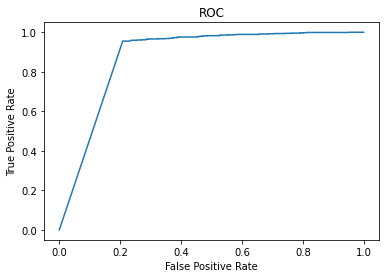

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

In [52]:
import pickle

# Exporting my model to use in a project 
Pkl_Filename = "SpamOrHam.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(bnb, file)

In [54]:
# Exporting Counter Vector to get the BOW at Runtime
# Exporting my model to use in a project 
CV_Pkl_Filename = "CounterVector.pkl"  

with open(CV_Pkl_Filename, 'wb') as file:  
    pickle.dump(vect, file)